# Introduction

This is looking at California election donation data taken from [FollowTheMoney.org](https://www.followthemoney.org/)

To retrieve the data follow these steps:

- From the home page, click "Start Here in "Ask Anything"
- Click "Contributions TO..." --> "Specific States" --> expand "State" --> "California" --> "OK"
- Click "Contributions TO..." --> "candidate(s)" --> "type of office" --> expand "State" --> "Gubernatorial" AND "Other Statewide" --> "OK"
- Click "Contributions TO..." --> "specific election year(s)" --> "2018" --> "OK"
- Click "Go!"

### Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
elections = pd.read_csv("data/summary.csv")
elections.describe()

,Candidate:id,Candidate_Entity:id,Status_of_Candidate:id,Specific_Party:id,General_Party:id,Election_Year:id,Election_Year,Election_Type:id,Office_Sought:id,#_of_Records,Total_$
count,703.000000,7.030000e+02,703.000000,703.000000,703.000000,703.000000,703.000000,703.0,703.000000,703.000000,7.030000e+02
mean,77474.667141,1.169083e+07,2.199147,87.297297,2.100996,2006.698435,2006.698435,1.0,9257.981508,659.770982,1.537289e+06
std,75211.260342,1.252181e+07,0.854116,66.896259,0.900957,6.348842,6.348842,0.0,213.333690,2275.270876,8.467992e+06
min,577.000000,2.164200e+04,1.000000,15.000000,1.000000,1998.000000,1998.000000,1.0,9169.000000,0.000000,-2.762504e+04
25%,26043.000000,6.413362e+06,2.000000,33.000000,1.000000,2002.000000,2002.000000,1.0,9169.000000,0.000000,0.000000e+00
50%,36324.000000,6.552526e+06,2.000000,73.000000,2.000000,2006.000000,2006.000000,1.0,9172.000000,1.000000,1.500000e+02
75%,115418.500000,1.300847e+07,2.000000,139.000000,3.000000,2010.000000,2010.000000,1.0,9175.000000,244.500000,2.366490e+05
max,247036.000000,4.493245e+07,9.000000,498.000000,4.000000,2018.000000,2018.000000,1.0,10135.000000,26504.000000,1.766850e+08


In [5]:
elections = elections.drop(["Candidate:id", "request", "Candidate:token", 
           "Candidate_Entity:token", "Candidate_Entity:id", 
           "Election_Status:token", "Status_of_Candidate:token",
           "Status_of_Candidate:id", "Specific_Party:token", "Specific_Party:id",
           "Incumbency_Status:id", "General_Party:token", "General_Party:id", 
           "Election_Jurisdiction:token", "Election_Jurisdiction:id",
           "Election_Year:token", "Incumbency_Status:token", "Office_Sought:id",
           "Office_Sought:token", "Election_Type:id", "Election_Type:token", 
           "Candidate_Entity", "Election_Status:id", "Election_Year:id"], axis=1)
elections.head()

,Candidate,Election_Status,Status_of_Candidate,Specific_Party,General_Party,Election_Jurisdiction,Election_Year,Election_Type,Office_Sought,Incumbency_Status,#_of_Records,Total_$
0,"WHITMAN, MARGARET C (MEG)",Lost-General,Lost,REPUBLICAN,Republican,CA,2010,Standard,GOVERNOR,Open,9016,1.766850e+08
1,"DAVIS, GRAY",Won-General,Won,DEMOCRATIC,Democratic,CA,2002,Standard,GOVERNOR,Incumbent,10723,5.818369e+07
2,"SCHWARZENEGGER, ARNOLD",Won-General,Won,REPUBLICAN,Republican,CA,2006,Standard,GOVERNOR,Incumbent,14151,4.735225e+07
3,"SIMON JR, WILLIAM E (BILL)",Lost-General,Lost,REPUBLICAN,Republican,CA,2002,Standard,GOVERNOR,Challenger,21245,4.553054e+07
4,"WESTLY, STEVEN P",Lost-Primary,Lost,DEMOCRATIC,Democratic,CA,2006,Standard,GOVERNOR,Open,5353,4.528054e+07


### Money spending per office

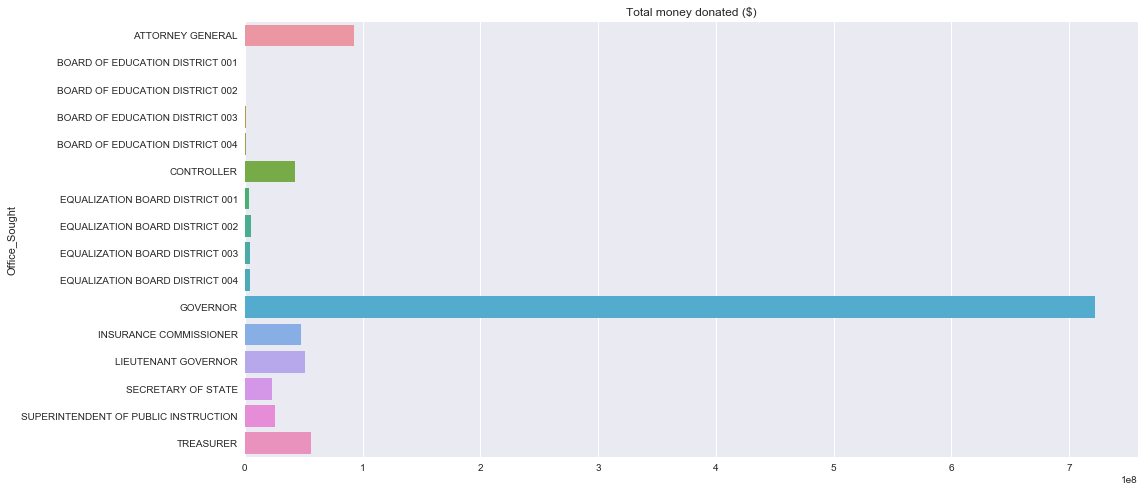

In [6]:
plt.figure(figsize=(16,8))
data = elections.groupby("Office_Sought")["Total_$"].sum()
_ = sns.barplot(data.values, data.index).set(title="Total money donated ($)")

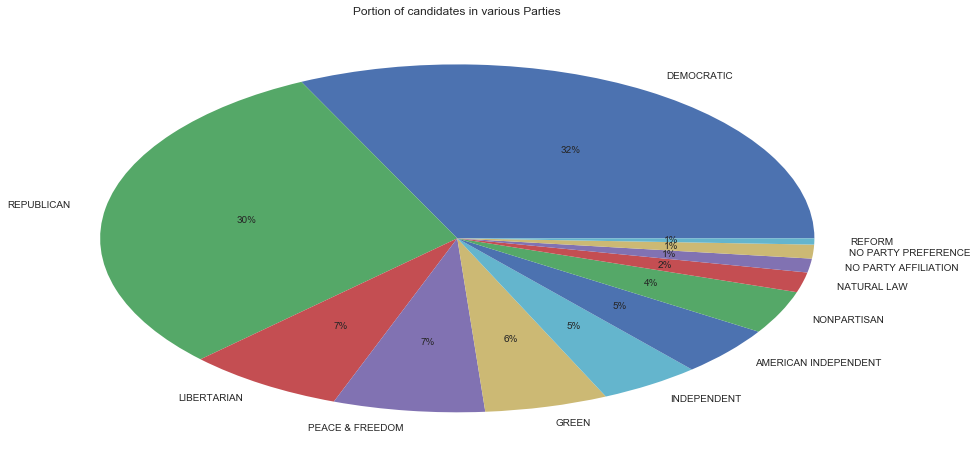

In [7]:
plt.figure(figsize=(16,8))

_ = (
        elections["Specific_Party"]
            .value_counts()
            .head(12)
            .plot(kind="pie", autopct='%1.0f%%')
            .set(title="Portion of candidates in various Parties", ylabel="")
)

### Election years in the dataset

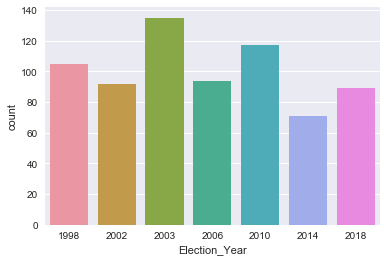

In [11]:
_ = sns.countplot(elections.Election_Year)

### Distribution of Offices sought

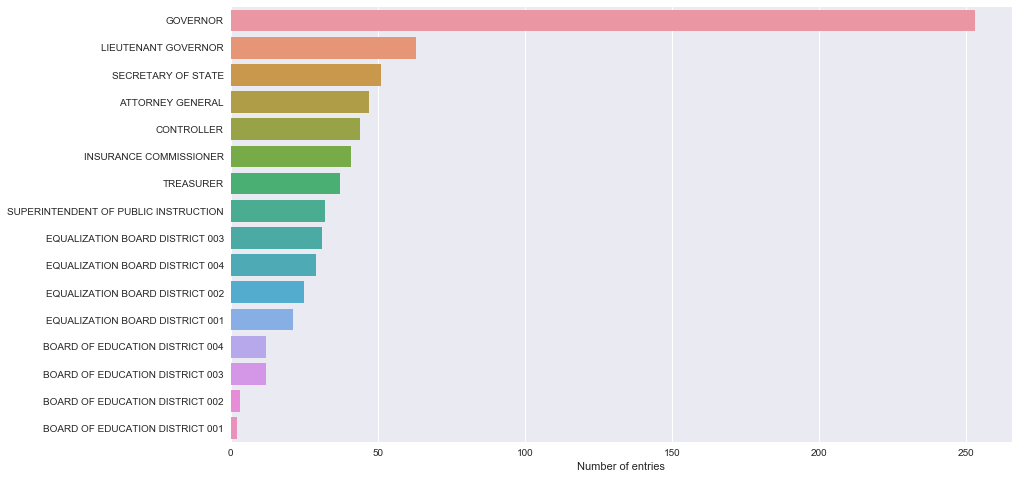

In [44]:
plt.figure(figsize=(14, 8))
data = elections.Office_Sought.value_counts()
_ = sns.barplot(data.values, data.index).set(xlabel="Number of entries")

### Anomalies

In [16]:
elections[elections["Total_$"] < 0]

,Candidate,Election_Status,Status_of_Candidate,Specific_Party,General_Party,Election_Jurisdiction,Election_Year,Election_Type,Office_Sought,Incumbency_Status,#_of_Records,Total_$
358,"LEVITT, SCOTT L",Lost-Primary,Lost,REPUBLICAN,Republican,CA,2010,Standard,LIEUTENANT GOVERNOR,Open,49,-27625.04


### Misc

In [55]:
low = lambda x: x.lower()
third_party = elections[elections.Specific_Party.map(low) != elections.General_Party.map(low)]
all(third_party.General_Party == "Third-Party")

True

### Highest grossing candidates

In [18]:
elections.sort_values("Total_$", ascending=False).head(10)

,Candidate,Election_Status,Status_of_Candidate,Specific_Party,General_Party,Election_Jurisdiction,Election_Year,Election_Type,Office_Sought,Incumbency_Status,#_of_Records,Total_$
0,"WHITMAN, MARGARET C (MEG)",Lost-General,Lost,REPUBLICAN,Republican,CA,2010,Standard,GOVERNOR,Open,9016,1.766850e+08
1,"DAVIS, GRAY",Won-General,Won,DEMOCRATIC,Democratic,CA,2002,Standard,GOVERNOR,Incumbent,10723,5.818369e+07
2,"SCHWARZENEGGER, ARNOLD",Won-General,Won,REPUBLICAN,Republican,CA,2006,Standard,GOVERNOR,Incumbent,14151,4.735225e+07
3,"SIMON JR, WILLIAM E (BILL)",Lost-General,Lost,REPUBLICAN,Republican,CA,2002,Standard,GOVERNOR,Challenger,21245,4.553054e+07
4,"WESTLY, STEVEN P",Lost-Primary,Lost,DEMOCRATIC,Democratic,CA,2006,Standard,GOVERNOR,Open,5353,4.528054e+07
5,"BROWN JR, EDMUND G (JERRY)",Won-General,Won,DEMOCRATIC,Democratic,CA,2010,Standard,GOVERNOR,Open,17604,4.055661e+07
6,"DAVIS, GRAY",Won-General,Won,DEMOCRATIC,Democratic,CA,1998,Standard,GOVERNOR,Open,12371,3.508420e+07
7,"CHECCHI, ALFRED A",Lost-Primary,Lost,DEMOCRATIC,Democratic,CA,1998,Standard,GOVERNOR,Open,21,3.502799e+07
8,"ANGELIDES, PHIL",Lost-General,Lost,DEMOCRATIC,Democratic,CA,2006,Standard,GOVERNOR,Challenger,16660,3.027077e+07
9,"LUNGREN, DANIEL E",Lost-General,Lost,REPUBLICAN,Republican,CA,1998,Standard,GOVERNOR,Open,21607,2.909143e+07


### Has anyone raised low amounts of money and still won

Apparently, it depends what you mean by low

In [37]:
low_cutoff = 20 * (10**6)
office = "GOVERNOR"
elections[
            (elections["Total_$"] < low_cutoff) &
            (elections["Status_of_Candidate"] == "Won") &
            (elections["Office_Sought"] == office)
         ]

,Candidate,Election_Status,Status_of_Candidate,Specific_Party,General_Party,Election_Jurisdiction,Election_Year,Election_Type,Office_Sought,Incumbency_Status,#_of_Records,Total_$
14,"SCHWARZENEGGER, ARNOLD",Won-General,Won,REPUBLICAN,Republican,CA,2003,Standard,GOVERNOR,Open,7091,17947547.59


### How does money raised effect winning percentages?

### How does incumbency effect winning percentages?